In [49]:
import pandas as pd
df = pd.read_csv('spell_checked_df.csv')
df.head()

,match_no,batting_team,batting_side,overs,runs,"bowler_to_batsman, runs",commentary,numerical_runs,bowler,batsman,preprocessed_commentary
0,1,AFG,2,0.1,1,"Madushanka to Hazratullah Zazai, 1 run",nudged down to fine leg for a single,1,Madushanka,Hazratullah Zazai,"['nudg', 'fine', 'leg']"
1,1,AFG,2,0.2,0,"Madushanka to Rahmanullah, no run","lovely delivery, Holds its line and beats the ...",0,Madushanka,Rahmanullah,"['love', 'deliveri', 'hold', 'line', 'beat', '..."
2,1,AFG,2,0.3,1lb,"Madushanka to Rahmanullah, 1 leg bye",shaping back into him. He squeezes it thbrough...,1,Madushanka,Rahmanullah,"['shape', 'back', 'squeez', 'onsid']"
3,1,AFG,2,0.4,0,"Madushanka to Hazratullah Zazai, no run","driven to extra cover, where it's well fielded",0,Madushanka,Hazratullah Zazai,"['driven', 'extra', 'cover', 'well', 'field']"
4,1,AFG,2,0.5,5w,"Madushanka to Hazratullah Zazai, 5 wide","well, that's help. 5 free runs gifted to Afgha...",5,Madushanka,Hazratullah Zazai,"['well', 'help', 'free', 'run', 'gift', 'thi',..."


In [50]:
df.columns

Index(['match_no', 'batting_team', 'batting_side', 'overs', 'runs',
       'bowler_to_batsman, runs', 'commentary', 'numerical_runs', 'bowler',
       'batsman', 'preprocessed_commentary'],
      dtype='object')

In [51]:
df.dtypes

match_no                     int64
batting_team                object
batting_side                 int64
overs                      float64
runs                        object
bowler_to_batsman, runs     object
commentary                  object
numerical_runs               int64
bowler                      object
batsman                     object
preprocessed_commentary     object
dtype: object

In [52]:
# Define the function to remove words
def remove_words(commentary):
    # Remove brackets and replace semicolons with commas
    string_value = commentary.replace('[', '').replace(']', '').replace(';', ',')

    # Remove single quotes from each word
    string_value = string_value.replace("'", "")

    # Then split the string into a list
    list_value = string_value.split(',')
    words_to_remove = ["sri", "lanka", "hong", "kong", "rajapaksa"]
    result_list = [word.strip() for word in list_value if word.strip() not in words_to_remove]
    print("Original List:", list_value)
    print("Processed List:", result_list)
    return result_list

df['new_preprocessed_commentary'] = df['preprocessed_commentary'].apply(remove_words)

# Define the words to remove
words_to_remove = ["sri", "lanka", "hong", "kong", "rajapaksa"]

Original List: ['nudg', ' fine', ' leg']
Processed List: ['nudg', 'fine', 'leg']
Original List: ['love', ' deliveri', ' hold', ' line', ' beat', ' defens', ' straight', ' bat']
Processed List: ['love', 'deliveri', 'hold', 'line', 'beat', 'defens', 'straight', 'bat']
Original List: ['shape', ' back', ' squeez', ' onsid']
Processed List: ['shape', 'back', 'squeez', 'onsid']
Original List: ['driven', ' extra', ' cover', ' well', ' field']
Processed List: ['driven', 'extra', 'cover', 'well', 'field']
Original List: ['well', ' help', ' free', ' run', ' gift', ' thi', ' far', ' leg', ' keeper', ' nought']
Processed List: ['well', 'help', 'free', 'run', 'gift', 'thi', 'far', 'leg', 'keeper', 'nought']
Original List: ['swing', ' miss', ' outsid']
Processed List: ['swing', 'miss', 'outsid']
Original List: ['pick', ' midwicket', ' race', ' away', ' great', ' start']
Processed List: ['pick', 'midwicket', 'race', 'away', 'great', 'start']
Original List: ['look', ' heav', ' cover', ' trap', ' front

In [53]:
def get_batsmen_bowler_names(df):
    bowlers = list(df['bowler'].unique())
    batsmen = list(df['batsman'].unique())
    players = bowlers + batsmen
    return players

def remove_players(text, players):
    keywords = ['bhuvneshwar', 'suryakumar', 'asalanka', 'silva', 'khushdil', 'kohl', 'nissanka',
                'madushanka', 'iftikhar', 'hasnain', 'hasaranga', 'karunaratn', 'nawab']
    
    players = [player.lower() for player in players] 
    keywords = [keyword.lower() for keyword in keywords]  
    
    players = players + keywords
    
    return [word for word in text if word.lower() not in players]  

players = get_batsmen_bowler_names(df)
df['new_preprocessed_commentary_players_removed'] = df['new_preprocessed_commentary'].apply(lambda x: remove_players(x, players))
#test
print(df.iloc[26]['new_preprocessed_commentary_players_removed'])

['treatment', 'end', 'urban', 'move', 'across', 'leg', 'side', 'follow', 'urban', 'get', 'low', 'play', 'hippi', 'sweep', 'hi', 'pad', 'deep', 'backward', 'squar', 'leg']


In [54]:
import pandas as pd
# Initialize the 'bowling_team' column with 'Other'
df['bowling_team'] = 'Other'

# Iterate over the range of matches
for match_no in range(1, 14):
    # Extract the batting teams for the current match
    team1 = df[(df['match_no'] == match_no) & (df['batting_side'] == 1)]['batting_team'].iloc[0]
    team2 = df[(df['match_no'] == match_no) & (df['batting_side'] == 2)]['batting_team'].iloc[0]
    
    # Assign the opponent team as the bowling team for each occurrence of a team in the batting team column
    df.loc[(df['match_no'] == match_no) & (df['batting_team'] == team1), 'bowling_team'] = team2
    df.loc[(df['match_no'] == match_no) & (df['batting_team'] == team2), 'bowling_team'] = team1

# Print the DataFrame to verify
df.head()

,match_no,batting_team,batting_side,overs,runs,"bowler_to_batsman, runs",commentary,numerical_runs,bowler,batsman,preprocessed_commentary,new_preprocessed_commentary,new_preprocessed_commentary_players_removed,bowling_team
0,1,AFG,2,0.1,1,"Madushanka to Hazratullah Zazai, 1 run",nudged down to fine leg for a single,1,Madushanka,Hazratullah Zazai,"['nudg', 'fine', 'leg']","[nudg, fine, leg]","[nudg, fine, leg]",SL
1,1,AFG,2,0.2,0,"Madushanka to Rahmanullah, no run","lovely delivery, Holds its line and beats the ...",0,Madushanka,Rahmanullah,"['love', 'deliveri', 'hold', 'line', 'beat', '...","[love, deliveri, hold, line, beat, defens, str...","[love, deliveri, hold, line, beat, defens, str...",SL
2,1,AFG,2,0.3,1lb,"Madushanka to Rahmanullah, 1 leg bye",shaping back into him. He squeezes it thbrough...,1,Madushanka,Rahmanullah,"['shape', 'back', 'squeez', 'onsid']","[shape, back, squeez, onsid]","[shape, back, squeez, onsid]",SL
3,1,AFG,2,0.4,0,"Madushanka to Hazratullah Zazai, no run","driven to extra cover, where it's well fielded",0,Madushanka,Hazratullah Zazai,"['driven', 'extra', 'cover', 'well', 'field']","[driven, extra, cover, well, field]","[driven, extra, cover, well, field]",SL
4,1,AFG,2,0.5,5w,"Madushanka to Hazratullah Zazai, 5 wide","well, that's help. 5 free runs gifted to Afgha...",5,Madushanka,Hazratullah Zazai,"['well', 'help', 'free', 'run', 'gift', 'thi',...","[well, help, free, run, gift, thi, far, leg, k...","[well, help, free, run, gift, thi, far, leg, k...",SL


Total runs for each team:
batting_team
AFG      571
BAN      310
HKG       76
INDIA    775
PAK      858
SL       793
Name: numerical_runs, dtype: int64


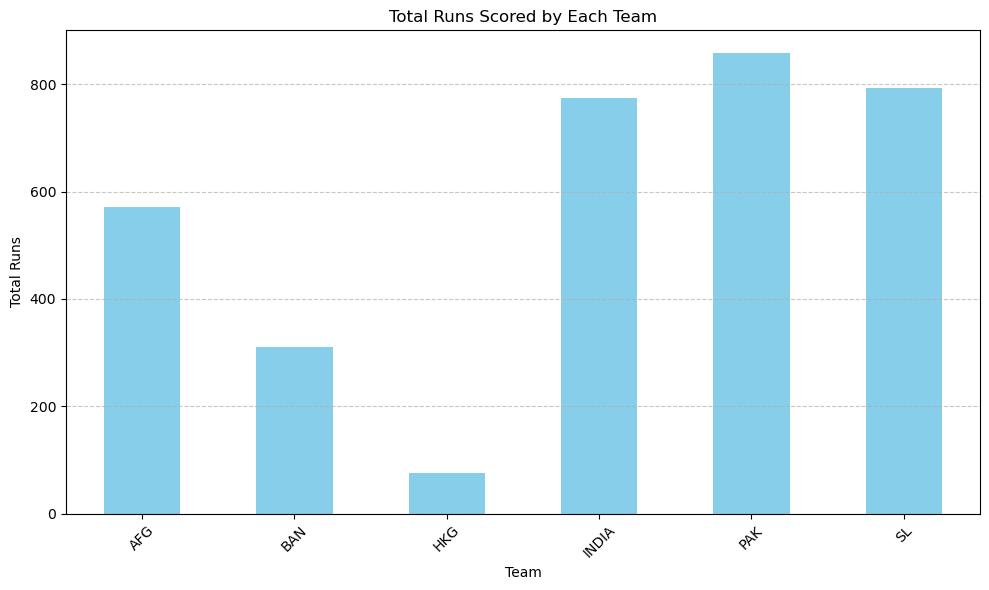

In [55]:
import matplotlib.pyplot as plt

# Grouping by 'batting_team' and summing up 'numerical_runs'
team_runs = df.groupby('batting_team')['numerical_runs'].sum()

# Filter the runs for the desired teams
desired_teams = ['SL', 'INDIA', 'PAK', 'AFG', 'BAN', 'HKG']
team_runs_filtered = team_runs[team_runs.index.isin(desired_teams)]

print("Total runs for each team:")
print(team_runs_filtered)

# Plotting the total runs for each team
plt.figure(figsize=(10, 6))
team_runs_filtered.plot(kind='bar', color='skyblue')
plt.title('Total Runs Scored by Each Team')
plt.xlabel('Team')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [56]:
import pandas as pd

# Grouping by 'batting_team' and counting the number of unique match numbers
matches_played = df.groupby('batting_team')['match_no'].nunique()

print("Number of matches played by each team:")
print(matches_played)

# Grouping by 'match_no' and collecting the batting teams for each match
matches_teams = df.groupby('match_no')['batting_team'].unique()

print("Batting teams for each match:")
for match_no, teams in matches_teams.items():
    print(f"Match {match_no}: {', '.join(teams)}")


Number of matches played by each team:
batting_team
AFG      5
BAN      2
HKG      2
INDIA    5
PAK      6
SL       6
Name: match_no, dtype: int64
Batting teams for each match:
Match 1: AFG, SL
Match 2: INDIA, PAK
Match 3: AFG, BAN
Match 4: HKG, INDIA
Match 5: SL, BAN
Match 6: HKG, PAK
Match 7: SL, AFG
Match 8: PAK, INDIA
Match 9: SL, INDIA
Match 10: PAK, AFG
Match 11: AFG, INDIA
Match 12: SL, PAK
Match 13: PAK, SL


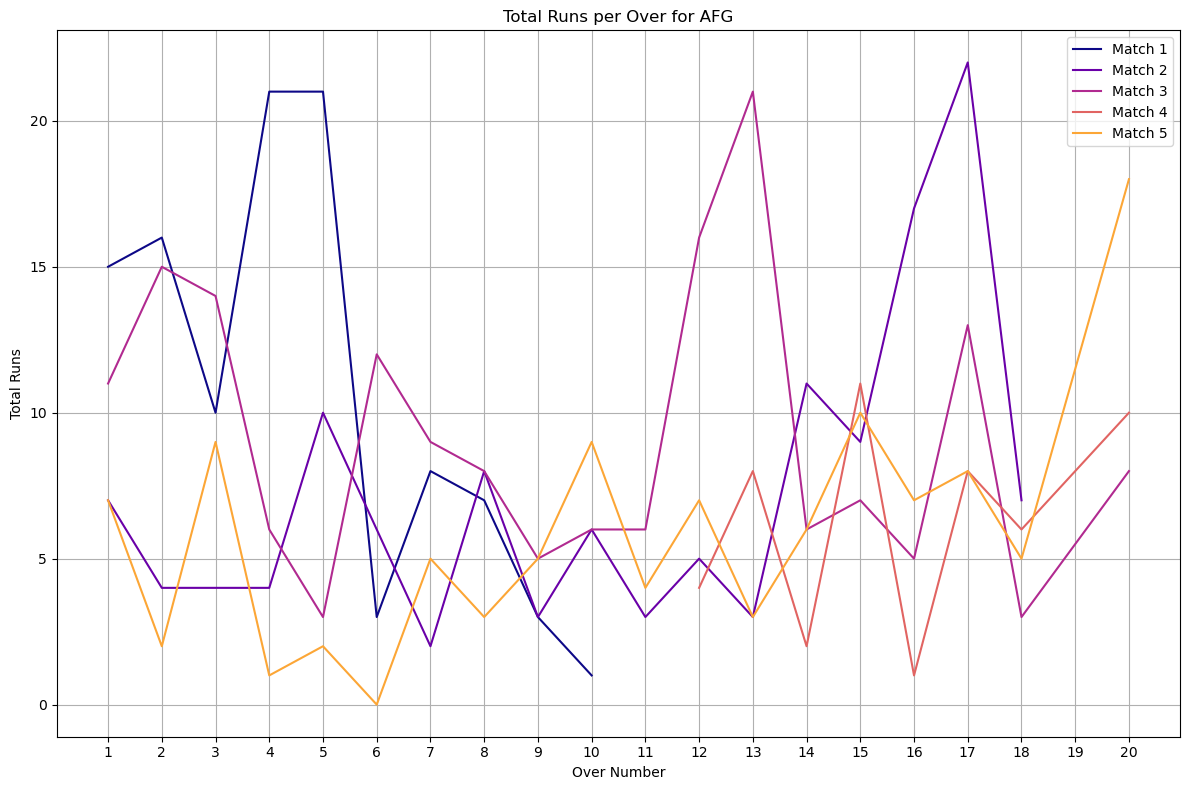

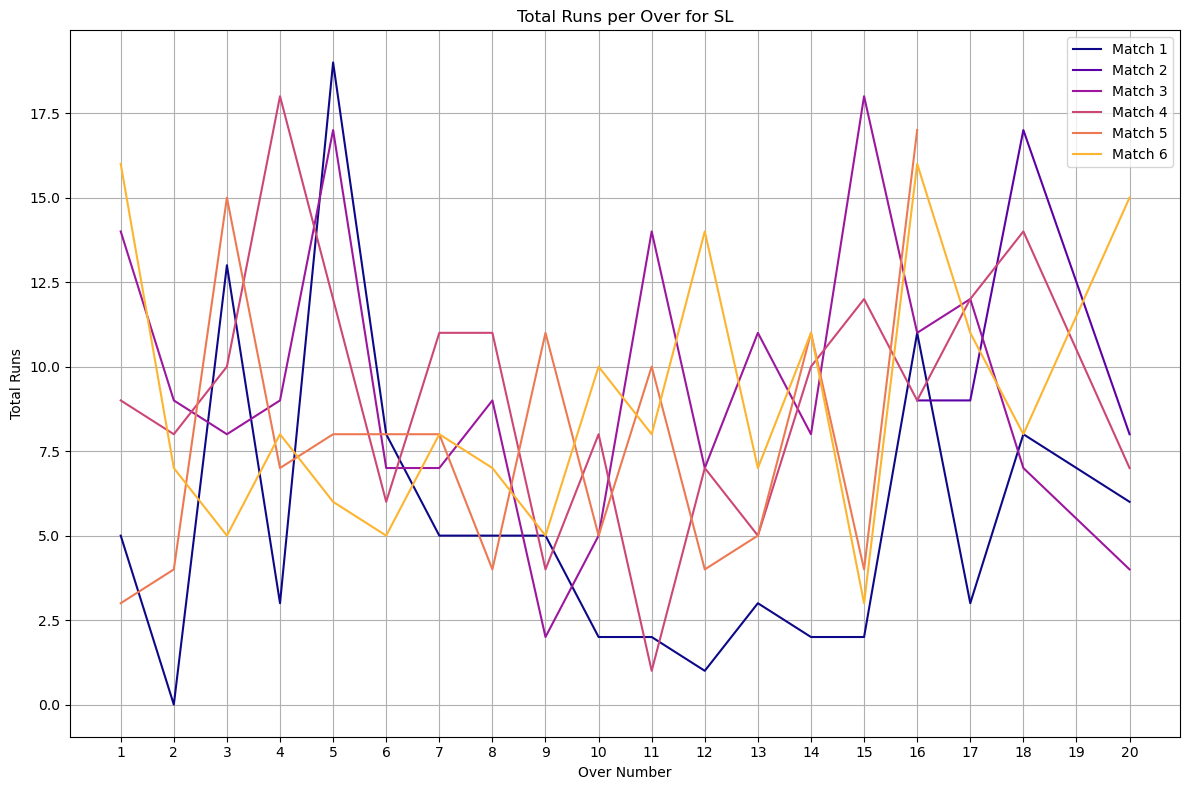

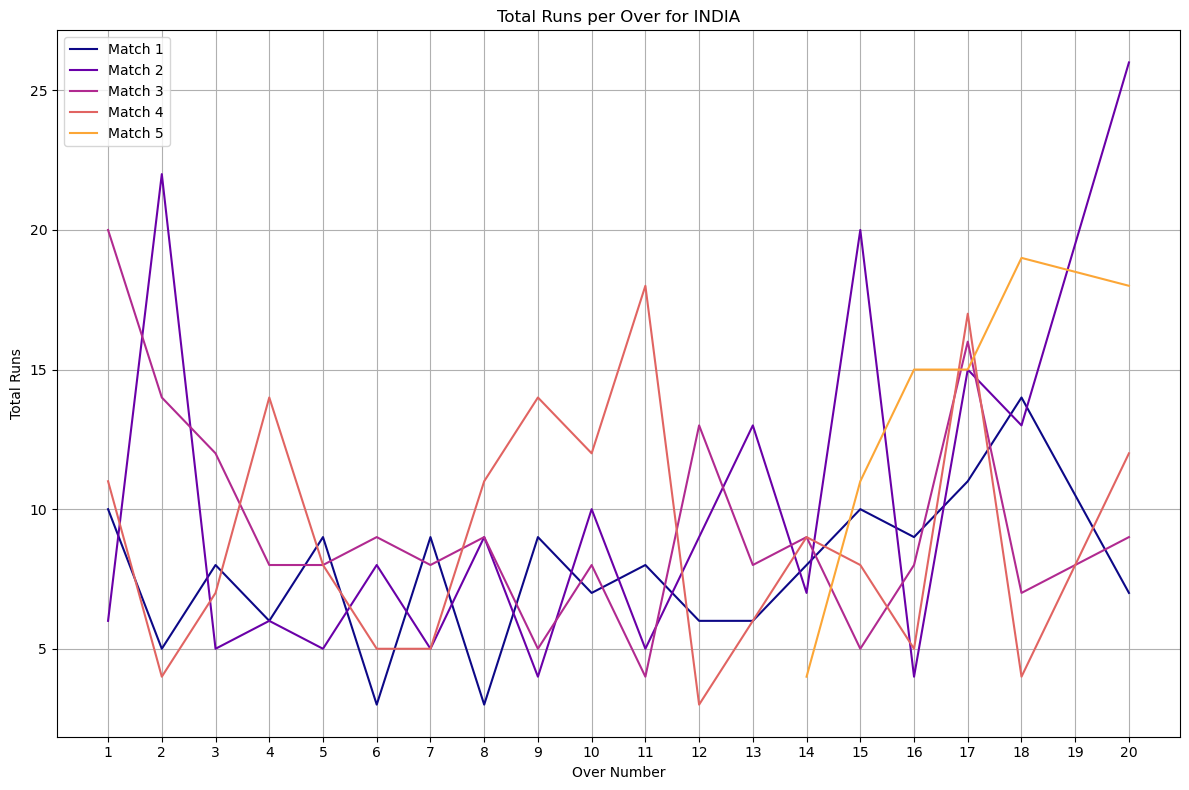

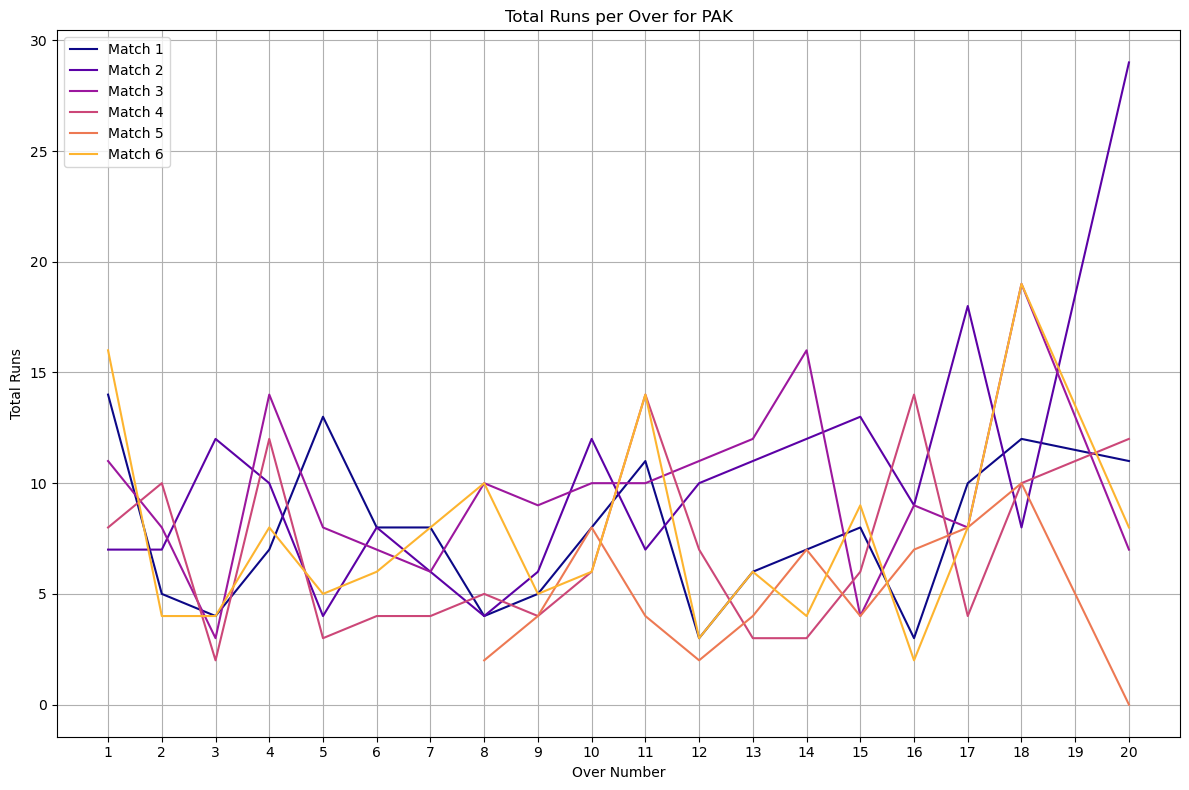

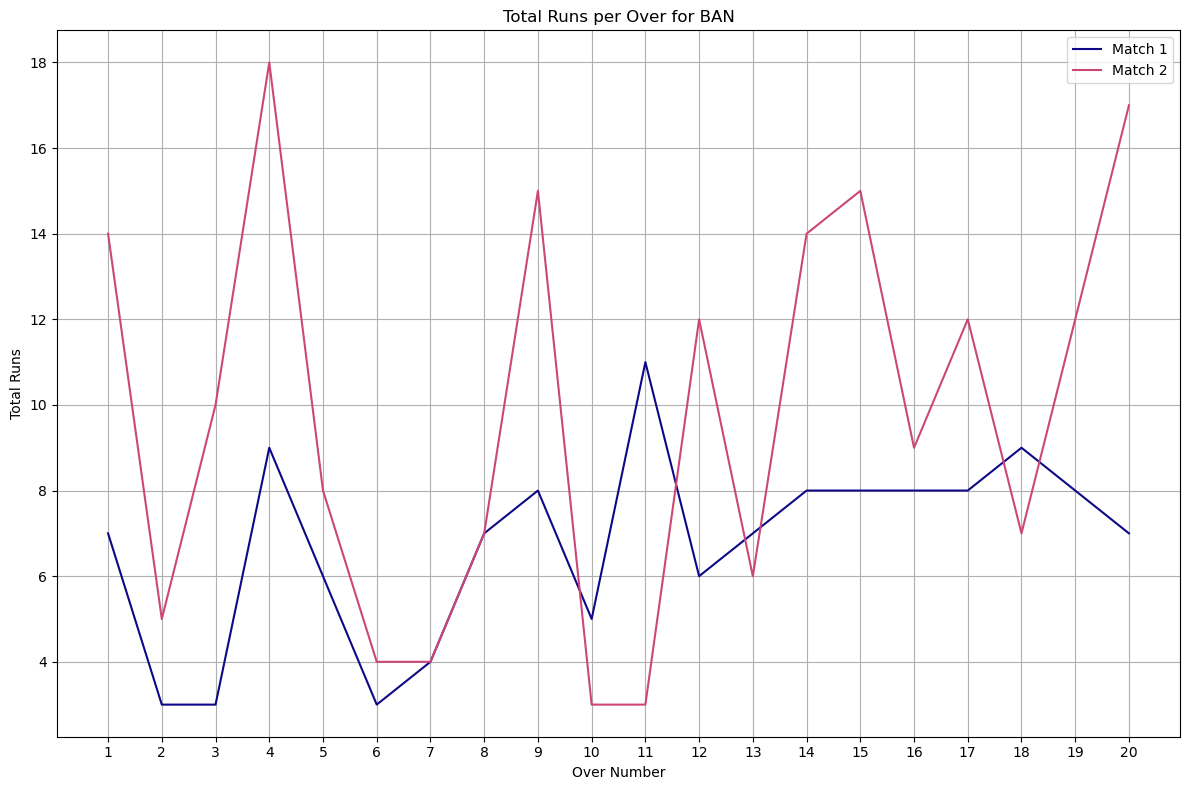

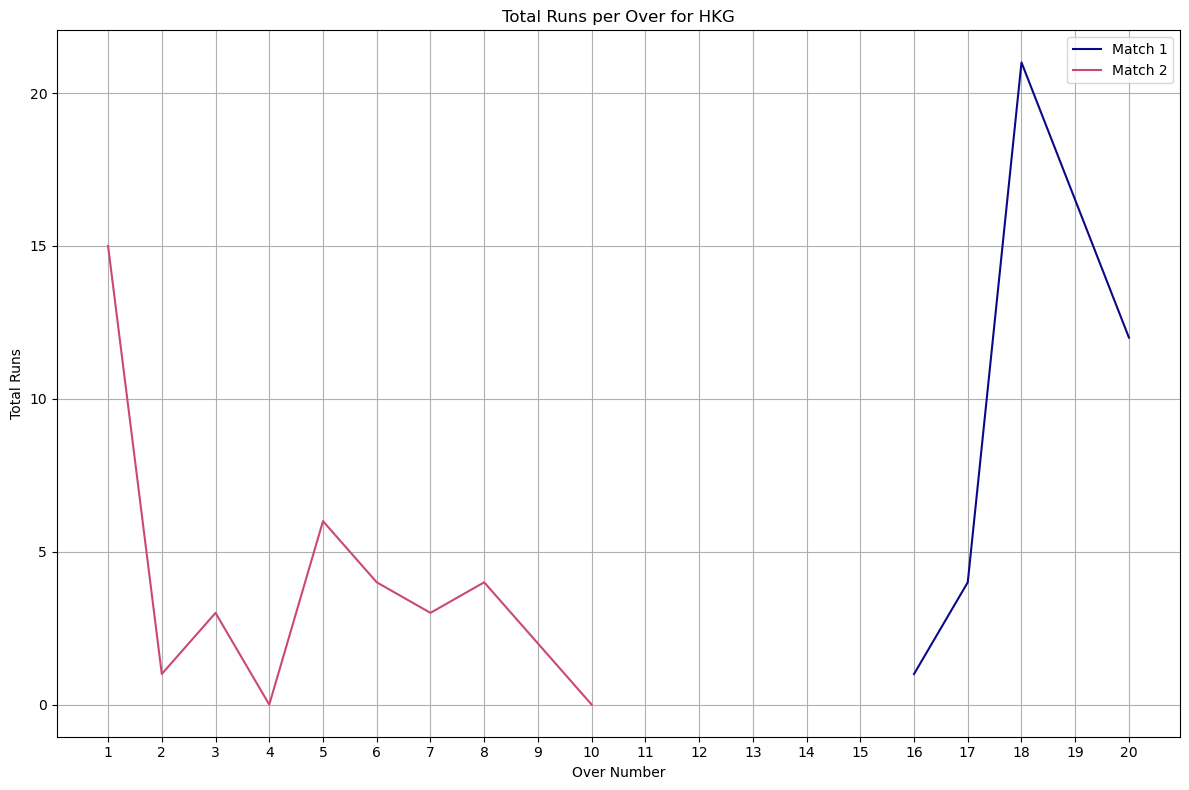

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Initialize an empty dictionary to store aggregated data for each team
team_over_totals = {}

# Iterate over each match
for match_no in df['match_no'].unique():
    # Filter data for the current match
    match_df = df[df['match_no'] == match_no].copy()  # Make a copy to avoid SettingWithCopyWarning

    # Convert the "overs" column to over numbers between 1 and 20
    match_df.loc[:, 'over_number'] = match_df['overs'].apply(lambda x: int(x) + 1 if x < 1 else 20 if x > 19 else int(x))

    # Group by batting team, over number, and sum up the runs scored in each over
    over_totals = match_df.groupby(['batting_team', 'over_number'])['numerical_runs'].sum().reset_index()

    # Aggregate data for each team
    for team in over_totals['batting_team'].unique():
        team_data = over_totals[over_totals['batting_team'] == team]
        if team not in team_over_totals:
            team_over_totals[team] = [team_data]
        else:
            team_over_totals[team].append(team_data)

# Plotting separate graphs for each team
for team, data_list in team_over_totals.items():
    plt.figure(figsize=(12, 8))
    for idx, data in enumerate(data_list):
        color = plt.cm.plasma(idx / len(data_list))  
        plt.plot(data['over_number'], data['numerical_runs'], label=f'Match {idx + 1}', color=color)
    plt.title(f'Total Runs per Over for {team}')
    plt.xlabel('Over Number')
    plt.ylabel('Total Runs')
    plt.xticks(range(1, 21))  # Set ticks from 1 to 20
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


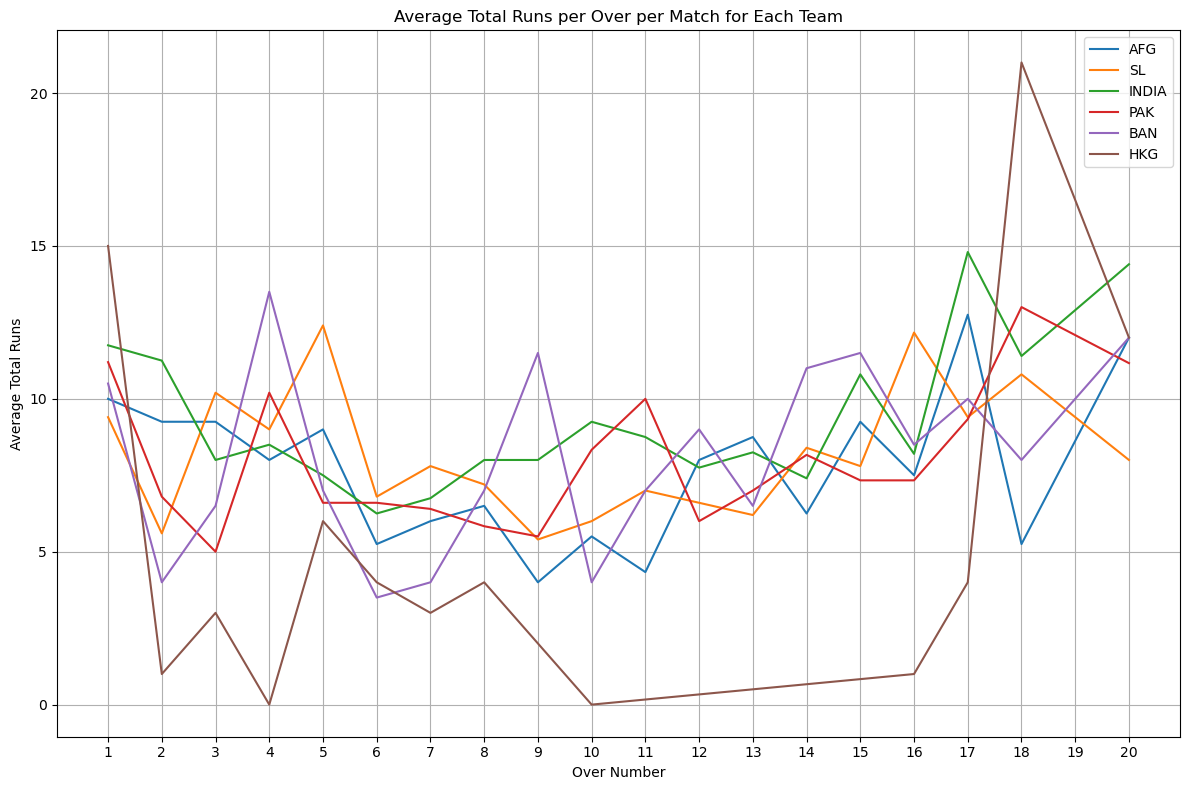

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Initialize an empty dictionary to store aggregated data for each team
team_over_totals = {}

# Iterate over each match
for match_no in df['match_no'].unique():
    # Filter data for the current match
    match_df = df[df['match_no'] == match_no].copy()  # Make a copy to avoid SettingWithCopyWarning

    # Convert the "overs" column to over numbers between 1 and 20
    match_df['over_number'] = match_df['overs'].apply(lambda x: int(x) + 1 if x < 1 else 20 if x > 19 else int(x))

    # Group by batting team, over number, and sum up the runs scored in each over
    over_totals = match_df.groupby(['batting_team', 'over_number'])['numerical_runs'].sum().reset_index()

    # Aggregate data for each team
    for team in over_totals['batting_team'].unique():
        team_data = over_totals[over_totals['batting_team'] == team]
        if team not in team_over_totals:
            team_over_totals[team] = [team_data]
        else:
            team_over_totals[team].append(team_data)

# Calculate the average total runs per over for each team
team_over_averages = {}

for team, data_list in team_over_totals.items():
    average_data = pd.concat(data_list).groupby('over_number')['numerical_runs'].mean()
    team_over_averages[team] = average_data

# Plotting average runs per over for each team
plt.figure(figsize=(12, 8))
for team, data in team_over_averages.items():
    plt.plot(data.index, data.values, label=team)

plt.title('Average Total Runs per Over per Match for Each Team')
plt.xlabel('Over Number')
plt.ylabel('Average Total Runs')
plt.xticks(range(1, 21))  # Set ticks from 1 to 20
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


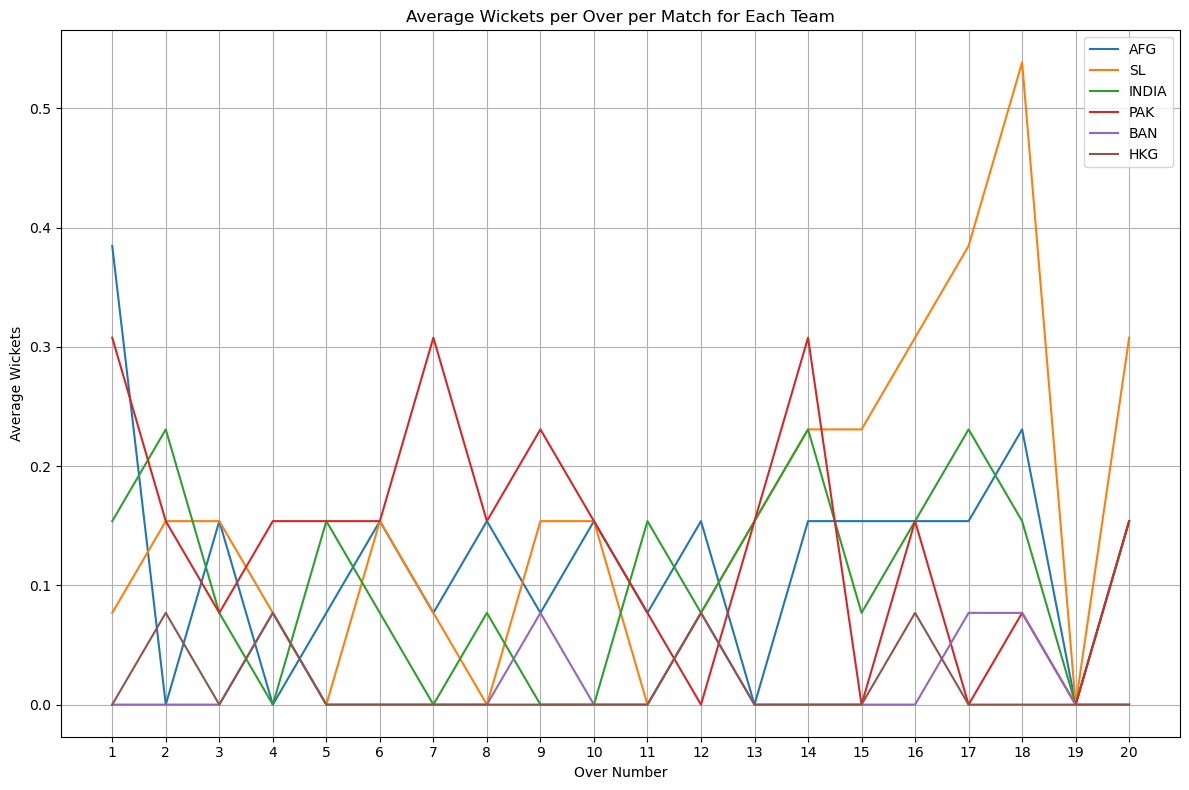

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Initialize an empty dictionary to store aggregated data for each team
team_wicket_totals = {}

# Iterate over each match
for match_no in df['match_no'].unique():
    # Filter data for the current match
    match_df = df[df['match_no'] == match_no].copy()  # Make a copy to avoid SettingWithCopyWarning

    # Convert the "overs" column to over numbers between 1 and 20
    match_df['over_number'] = match_df['overs'].apply(lambda x: int(x) + 1 if x < 1 else 20 if x > 19 else int(x))

    # Count wickets for each team for each over
    wicket_totals = match_df[match_df['runs'] == 'W'].groupby(['bowling_team', 'over_number']).size().reset_index(name='wickets')

    # Aggregate data for each team
    for team, data in wicket_totals.groupby('bowling_team'):
        if team not in team_wicket_totals:
            team_wicket_totals[team] = [0] * 20  # Initialize wicket count for each over to 0
        for _, row in data.iterrows():
            team_wicket_totals[team][row['over_number'] - 1] += row['wickets']

# Calculate the average wickets per over for each team
num_matches = len(df['match_no'].unique())
team_wicket_averages = {team: [wickets / num_matches for wickets in totals] for team, totals in team_wicket_totals.items()}

# Plotting average wickets per over for each team
plt.figure(figsize=(12, 8))
for team, averages in team_wicket_averages.items():
    plt.plot(range(1, 21), averages, label=team)

plt.title('Average Wickets per Over per Match for Each Team')
plt.xlabel('Over Number')
plt.ylabel('Average Wickets')
plt.xticks(range(1, 21))  # Set ticks from 1 to 20
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [60]:
desired_teams = ['SL', 'INDIA', 'PAK', 'AFG', 'BAN', 'HKG']

# Initialize dictionaries to store unique batsmen and bowlers for each team
unique_batsmen = {}
unique_bowlers = {}

# Iterate through the dataframe
for team in desired_teams:
    # Filter data for the current team
    team_data = df[df['batting_team'] == team]
    
    # Extract unique batsmen and bowlers for the current team
    unique_batsmen[team] = team_data['batsman'].unique()

# Print unique batsmen and bowlers for each team
for team in desired_teams:
    print("Team:", team)
    print("Unique Batsmen:", unique_batsmen[team])

Team: SL
Unique Batsmen: ['Nissanka' 'Mendis' 'Asalanka' 'Gunathilaka' 'Rajapaksa'
 'Hasaranga de Silva' 'Shanaka' 'C Karunaratne' 'Pathirana' 'Madushanka'
 'Theekshana' 'Asitha Fernando' 'Dhananjaya']
Team: INDIA
Unique Batsmen: ['Rohit Sharma' 'Rahul' 'Kohli' 'Jadeja' 'Yadav' 'Hardik' 'Karthik' 'Pant'
 'Hooda' 'Ravi Bishnoi' 'Ashwin' 'Bhuvneshwar' 'Arshdeep Singh']
Team: PAK
Unique Batsmen: ['Rizwan' 'Babar Azam' 'Zaman' 'Iftikhar' 'Khushdil' 'Shadab' 'Asif Ali'
 'Nawaz' 'Haris Rauf' 'Naseem Shah' 'Dahani' 'Hasan Ali' 'Usman Qadir'
 'Mohammad Hasnain']
Team: AFG
Unique Batsmen: ['Hazratullah Zazai' 'Rahmanullah' 'Ibrahim Zadran' 'Zadran' 'M Nabi'
 'Rashid Khan' 'Karim Janat' 'Azmatullah' 'Mujeeb' 'Fareed Ahmad']
Team: BAN
Unique Batsmen: ['Mohammad Naim' 'Anamul' 'Shakib' 'Mushfiqur' 'Afif' 'Mahmudullah'
 'Mosaddek' 'Mahedi Hasan' 'Mehidy Hasan Miraz' 'Sabbir' 'Taskin']
Team: HKG
Unique Batsmen: ['Kinchit Shah' 'Zeeshan Ali' 'McKechnie' 'Nizakat Khan' 'Babar Hayat'
 'Yasim Murtaza' '

In [61]:
desired_teams = ['SL', 'INDIA', 'PAK', 'AFG', 'BAN', 'HKG']

# Initialize dictionaries to store unique batsmen and bowlers faced by each team
unique_batsmen_faced = {}
unique_bowlers_faced = {}

# Iterate through the dataframe
for team in desired_teams:
    # Filter data for the current team as bowling team
    team_data = df[df['bowling_team'] == team]
    
    # Extract unique batsmen and bowlers faced by the current team
    unique_bowlers_faced[team] = team_data['bowler'].unique()

# Print unique batsmen and bowlers faced by each team
for team in desired_teams:
    print("Team:", team)
    print("Unique Bowlers:", unique_bowlers_faced[team])
    print()

Team: SL
Unique Bowlers: ['Madushanka' 'Theekshana' 'Pathirana' 'Hasaranga de Silva'
 'C Karunaratne' 'Asalanka' 'Asitha Fernando' 'Shanaka' 'Dhananjaya'
 'Pramod Madushan Liyanagamage']

Team: INDIA
Unique Bowlers: ['Bhuvneshwar' 'Arshdeep Singh' 'Hardik' 'Avesh Khan' 'Chahal' 'Jadeja'
 'Kohli' 'Ravi Bishnoi' 'Ashwin' 'Chahar' 'Axar Patel' 'Hooda' 'Karthik']

Team: PAK
Unique Bowlers: ['Naseem Shah' 'Dahani' 'Haris Rauf' 'Shadab' 'Nawaz' 'Iftikhar'
 'Mohammad Hasnain' 'Hasan Ali' 'Usman Qadir']

Team: AFG
Unique Bowlers: ['Fazalhaq Farooqi' 'Naveen-ul-Haq' 'Mujeeb' 'Azmatullah' 'M Nabi'
 'Rashid Khan' 'Fareed Ahmad']

Team: BAN
Unique Bowlers: ['Shakib' 'Mustafizur' 'Mahedi Hasan' 'Taskin' 'Mosaddek' 'Saifuddin'
 'Ebadot Hossain']

Team: HKG
Unique Bowlers: ['Haroon Arshad' 'Shukla' 'Ehsan Khan' 'Aizaz Khan' 'Yasim Murtaza'
 'Mohammad Ghazanfar']



In [62]:
# Initialize dictionaries to store runs conceded, wickets taken, balls bowled, economy rate, and runs distribution for each bowler from each team
runs_per_bowler = {}
wickets_per_bowler = {}
balls_bowled_per_bowler = {}
economy_rate_per_bowler = {}
runs_distribution_per_bowler = {}

# Iterate through the dataframe
for index, row in df.iterrows():
    bowler = row['bowler']
    runs = row['numerical_runs']
    wicket = row['runs']
    batting_team = row['batting_team']
    bowling_team = row['bowling_team']
    
    # Increment balls bowled for the bowler
    if not pd.isna(bowler):
        if bowling_team not in balls_bowled_per_bowler:
            balls_bowled_per_bowler[bowling_team] = {}
        balls_bowled_per_bowler[bowling_team][bowler] = balls_bowled_per_bowler[bowling_team].get(bowler, 0) + 1

    # Check if the numerical_runs value is not NaN
    if not pd.isna(runs):
        # Calculate runs conceded
        if bowling_team not in runs_per_bowler:
            runs_per_bowler[bowling_team] = {}
        if bowler not in runs_per_bowler[bowling_team]:
            runs_per_bowler[bowling_team][bowler] = runs
        else:
            runs_per_bowler[bowling_team][bowler] += runs
        
        # Increment runs distribution based on the numerical_runs value
        if bowling_team not in runs_distribution_per_bowler:
            runs_distribution_per_bowler[bowling_team] = {}
        if bowler not in runs_distribution_per_bowler[bowling_team]:
            runs_distribution_per_bowler[bowling_team][bowler] = {'0s': 0, '1s': 0, '2s': 0, '3s': 0, '4s': 0, '5s': 0, '6s': 0}
        if runs == 0:
            runs_distribution_per_bowler[bowling_team][bowler]['0s'] += 1
        elif runs == 1:
            runs_distribution_per_bowler[bowling_team][bowler]['1s'] += 1
        elif runs == 2:
            runs_distribution_per_bowler[bowling_team][bowler]['2s'] += 1
        elif runs == 3:
            runs_distribution_per_bowler[bowling_team][bowler]['3s'] += 1
        elif runs == 4:
            runs_distribution_per_bowler[bowling_team][bowler]['4s'] += 1
        elif runs == 5:
            runs_distribution_per_bowler[bowling_team][bowler]['5s'] += 1
        elif runs == 6:
            runs_distribution_per_bowler[bowling_team][bowler]['6s'] += 1

    # Check if the runs column contains 'W' indicating a wicket
    if wicket == 'W':
        # Calculate wickets taken
        if bowling_team not in wickets_per_bowler:
            wickets_per_bowler[bowling_team] = {}
        if bowler not in wickets_per_bowler[bowling_team]:
            wickets_per_bowler[bowling_team][bowler] = 1
        else:
            wickets_per_bowler[bowling_team][bowler] += 1

# Calculate economy rate for each bowler
for team in runs_per_bowler.keys():
    economy_rate_per_bowler[team] = {}
    for bowler, runs in runs_per_bowler[team].items():
        balls_bowled = balls_bowled_per_bowler[team].get(bowler, 0)  # Get balls bowled by the bowler, or 0 if not present
        # Calculate economy rate (runs per over)
        economy_rate = (runs / balls_bowled) * 6 if balls_bowled != 0 else 0
        economy_rate_per_bowler[team][bowler] = economy_rate

# Print runs conceded, wickets taken, balls bowled, economy rate, and runs distribution per bowler for each team
for team in runs_per_bowler.keys():
    print("Team:", team)
    for bowler, runs in runs_per_bowler[team].items():
        wickets = wickets_per_bowler[team].get(bowler, 0)  # Get wickets taken for the bowler, or 0 if not present
        balls_bowled = balls_bowled_per_bowler[team].get(bowler, 0)  # Get balls bowled by the bowler, or 0 if not present
        runs_dist = runs_distribution_per_bowler[team].get(bowler, {'0s': 0, '1s': 0, '2s': 0, '3s': 0, '4s': 0, '5s': 0, '6s': 0})  # Get runs distribution for the bowler
        economy_rate = economy_rate_per_bowler[team].get(bowler, 0)  # Get economy rate for the bowler, or 0 if not present
        print("Bowler:", bowler, "| Runs Conceded:", runs, "| Wickets:", wickets, "| Balls Bowled:", balls_bowled, "| Economy Rate:", economy_rate, "| Runs Distribution:", runs_dist)
    print()

Team: SL
Bowler: Madushanka | Runs Conceded: 144 | Wickets: 7 | Balls Bowled: 121 | Economy Rate: 7.140495867768595 | Runs Distribution: {'0s': 45, '1s': 51, '2s': 7, '3s': 1, '4s': 12, '5s': 2, '6s': 3}
Bowler: Theekshana | Runs Conceded: 157 | Wickets: 8 | Balls Bowled: 142 | Economy Rate: 6.633802816901409 | Runs Distribution: {'0s': 55, '1s': 61, '2s': 10, '3s': 0, '4s': 10, '5s': 0, '6s': 6}
Bowler: Pathirana | Runs Conceded: 16 | Wickets: 0 | Balls Bowled: 6 | Economy Rate: 16.0 | Runs Distribution: {'0s': 2, '1s': 0, '2s': 1, '3s': 0, '4s': 2, '5s': 0, '6s': 1}
Bowler: Hasaranga de Silva | Runs Conceded: 168 | Wickets: 9 | Balls Bowled: 132 | Economy Rate: 7.636363636363637 | Runs Distribution: {'0s': 45, '1s': 59, '2s': 10, '3s': 0, '4s': 9, '5s': 1, '6s': 8}
Bowler: C Karunaratne | Runs Conceded: 144 | Wickets: 7 | Balls Bowled: 97 | Economy Rate: 8.907216494845361 | Runs Distribution: {'0s': 23, '1s': 48, '2s': 10, '3s': 1, '4s': 8, '5s': 1, '6s': 6}
Bowler: Asalanka | Runs C

In [63]:
# Initialize dictionaries to store total runs, runs distribution, dismissals, innings played, balls faced, and strike rate for each batsman for each team
total_runs_per_batsman = {}
runs_distribution_per_batsman = {}
dismissals_per_batsman = {}
innings_played_per_batsman = {}
balls_faced_per_batsman = {}
strike_rate_per_batsman = {}

# Iterate through the dataframe
for index, row in df.iterrows():
    batsman = row['batsman']
    runs = row['numerical_runs']
    wicket = row['runs']
    match_no = row['match_no']
    batting_team = row['batting_team']
    
    # Increment balls faced for the batsman
    if not pd.isna(batsman):
        if batting_team not in balls_faced_per_batsman:
            balls_faced_per_batsman[batting_team] = {}
        balls_faced_per_batsman[batting_team][batsman] = balls_faced_per_batsman[batting_team].get(batsman, 0) + 1

    # Check if the numerical_runs value is not NaN
    if not pd.isna(runs):
        # Calculate total runs scored by each batsman
        if batting_team not in total_runs_per_batsman:
            total_runs_per_batsman[batting_team] = {}
            runs_distribution_per_batsman[batting_team] = {}
            dismissals_per_batsman[batting_team] = {}
            innings_played_per_batsman[batting_team] = {}
            strike_rate_per_batsman[batting_team] = {}
        if batsman not in total_runs_per_batsman[batting_team]:
            total_runs_per_batsman[batting_team][batsman] = runs
            runs_distribution_per_batsman[batting_team][batsman] = {'0s': 0, '1s': 0, '2s': 0, '3s': 0, '4s': 0, '5s': 0, '6s': 0}
            dismissals_per_batsman[batting_team][batsman] = 0
            innings_played_per_batsman[batting_team][batsman] = 1
        else:
            total_runs_per_batsman[batting_team][batsman] += runs
        
        # Increment runs distribution based on the numerical_runs value
        if runs == 0:
            runs_distribution_per_batsman[batting_team][batsman]['0s'] += 1
        elif runs == 1:
            runs_distribution_per_batsman[batting_team][batsman]['1s'] += 1
        elif runs == 2:
            runs_distribution_per_batsman[batting_team][batsman]['2s'] += 1
        elif runs == 3:
            runs_distribution_per_batsman[batting_team][batsman]['3s'] += 1
        elif runs == 4:
            runs_distribution_per_batsman[batting_team][batsman]['4s'] += 1
        elif runs == 5:
            runs_distribution_per_batsman[batting_team][batsman]['5s'] += 1
        elif runs == 6:
            runs_distribution_per_batsman[batting_team][batsman]['6s'] += 1
    
    # Check if the runs column contains 'W' indicating dismissal
    if wicket == 'W':
        # Increment dismissals count for the batsman
        dismissals_per_batsman[batting_team][batsman] = dismissals_per_batsman[batting_team].get(batsman, 0) + 1

    # Calculate innings played by each batsman based on unique match_nos
    if batting_team in innings_played_per_batsman:
        innings_played_per_batsman[batting_team][batsman] = len(df[(df['batsman'] == batsman) & (df['batting_team'] == batting_team)]['match_no'].unique())

# Calculate strike rate for each batsman
for team in total_runs_per_batsman.keys():
    strike_rate_per_batsman[team] = {}
    for batsman, runs in total_runs_per_batsman[team].items():
        balls_faced = balls_faced_per_batsman[team].get(batsman, 0)  # Get balls faced by the batsman, or 0 if not present
        # Calculate strike rate
        strike_rate = (runs / balls_faced) * 100 if balls_faced != 0 else 0
        strike_rate_per_batsman[team][batsman] = strike_rate

# Print total runs, runs distribution, dismissals, innings played, balls faced, and strike rate for each batsman for each team
for team in total_runs_per_batsman.keys():
    print("Team:", team)
    for batsman in total_runs_per_batsman[team].keys():
        total_runs = total_runs_per_batsman[team][batsman]
        runs_distribution = runs_distribution_per_batsman[team][batsman]
        dismissals = dismissals_per_batsman[team][batsman]
        innings_played = innings_played_per_batsman[team][batsman]
        balls_faced = balls_faced_per_batsman[team][batsman]
        strike_rate = strike_rate_per_batsman[team][batsman]
        print("Batsman:", batsman, "| Total Runs Scored:", total_runs, "| Runs Distribution:", runs_distribution, "| Dismissals:", dismissals, "| Innings Played:", innings_played, "| Balls Faced:", balls_faced, "| Strike Rate:", strike_rate)
    print()


Team: AFG
Batsman: Hazratullah Zazai | Total Runs Scored: 80 | Runs Distribution: {'0s': 37, '1s': 21, '2s': 4, '3s': 0, '4s': 10, '5s': 1, '6s': 1} | Dismissals: 4 | Innings Played: 4 | Balls Faced: 74 | Strike Rate: 108.10810810810811
Batsman: Rahmanullah | Total Runs Scored: 147 | Runs Distribution: {'0s': 27, '1s': 32, '2s': 9, '3s': 0, '4s': 8, '5s': 1, '6s': 10} | Dismissals: 4 | Innings Played: 4 | Balls Faced: 87 | Strike Rate: 168.9655172413793
Batsman: Ibrahim Zadran | Total Runs Scored: 176 | Runs Distribution: {'0s': 59, '1s': 80, '2s': 12, '3s': 0, '4s': 12, '5s': 0, '6s': 4} | Dismissals: 2 | Innings Played: 5 | Balls Faced: 167 | Strike Rate: 105.38922155688624
Batsman: Zadran | Total Runs Scored: 76 | Runs Distribution: {'0s': 13, '1s': 18, '2s': 1, '3s': 0, '4s': 2, '5s': 0, '6s': 8} | Dismissals: 2 | Innings Played: 5 | Balls Faced: 42 | Strike Rate: 180.95238095238096
Batsman: M Nabi | Total Runs Scored: 17 | Runs Distribution: {'0s': 12, '1s': 6, '2s': 0, '3s': 1, '

In [64]:
# !pip install dash

In [66]:
import pandas as pd
import plotly.graph_objects as go
import dash
from dash import dcc, html, Input, Output

# Initialize dictionaries to store runs per over for each batsman
runs_per_over_per_batsman = {}
matches_batted_per_over_per_batsman = {}

# Iterate through the dataframe to calculate runs per over for each batsman
for index, row in df.iterrows():
    batsman = row['batsman']
    over_number = int(row['overs']) + 1  # Convert overs to over numbers between 1 and 20
    runs = row['numerical_runs']
    if not pd.isna(batsman):
        if batsman not in runs_per_over_per_batsman:
            runs_per_over_per_batsman[batsman] = [[] for _ in range(20)]  
            matches_batted_per_over_per_batsman[batsman] = [set() for _ in range(20)]  
        runs_per_over_per_batsman[batsman][over_number - 1].append(runs)
        matches_batted_per_over_per_batsman[batsman][over_number - 1].add(row['match_no'])

# Calculate average runs per over for each batsman based on matches the batsman participated in for that over
average_runs_per_over_per_batsman = {}
for batsman, runs_over in runs_per_over_per_batsman.items():
    average_runs_per_over_per_batsman[batsman] = [
        sum(runs) / len(matches_batted)
        if len(matches_batted) != 0
        else 0
        for runs, matches_batted in zip(runs_over, matches_batted_per_over_per_batsman[batsman])
    ]

# Initialize dictionaries to store wickets and runs per over for each bowler
wickets_per_over_per_bowler = {}
runs_per_over_per_bowler = {}
matches_bowled_per_over_per_bowler = {}

# Iterate through the dataframe to calculate wickets, runs, and matches bowled per over for each bowler
for index, row in df.iterrows():
    bowler = row['bowler']
    over_number = int(row['overs']) + 1  
    runs = row['numerical_runs']
    if not pd.isna(bowler):
        if bowler not in wickets_per_over_per_bowler:
            wickets_per_over_per_bowler[bowler] = [[] for _ in range(20)]  
            runs_per_over_per_bowler[bowler] = [[] for _ in range(20)] 
            matches_bowled_per_over_per_bowler[bowler] = [set() for _ in range(20)]  
        if row['runs'] == 'W':
            wickets_per_over_per_bowler[bowler][over_number - 1].append(1)
        else:
            wickets_per_over_per_bowler[bowler][over_number - 1].append(0)
        runs_per_over_per_bowler[bowler][over_number - 1].append(runs)
        matches_bowled_per_over_per_bowler[bowler][over_number - 1].add(row['match_no'])

# Calculate average wickets per over for each bowler based on matches the bowler participated in for that over
average_wickets_per_over_per_bowler = {}
for bowler, wickets_over in wickets_per_over_per_bowler.items():
    average_wickets_per_over_per_bowler[bowler] = [
        sum(wickets) / len(matches_bowled)
        if len(matches_bowled) != 0
        else 0
        for wickets, matches_bowled in zip(wickets_over, matches_bowled_per_over_per_bowler[bowler])
    ]

# Calculate average runs conceded per over for each bowler based on matches the bowler participated in for that over
average_runs_conceded_per_over_per_bowler = {}
for bowler, runs_over in runs_per_over_per_bowler.items():
    average_runs_conceded_per_over_per_bowler[bowler] = [
        sum(runs) / len(matches_bowled)
        if len(matches_bowled) != 0
        else 0
        for runs, matches_bowled in zip(runs_over, matches_bowled_per_over_per_bowler[bowler])
    ]

# Dropdown options for batting and bowling teams
team_options_bat = [{'label': team, 'value': team} for team in df['batting_team'].unique()]
team_options_bowl = [{'label': team, 'value': team} for team in df['bowling_team'].unique()]

# Create a Dash app
app = dash.Dash(__name__)

# Dropdown options for batsman statistics
batsman_statistics_options = [
    {'label': 'Average Runs Scored', 'value': 'average_runs'},
    {'label': 'Average Strike Rate', 'value': 'average_strike_rate'}
]

# Layout for the plots
app.layout = html.Div([
    html.Div([
        html.Label('Select Batting Team:'),
        dcc.Dropdown(id='team-dropdown-bat', options=team_options_bat, value=''),
        html.Label('Select Batsman:'),
        dcc.Dropdown(id='batsman-dropdown', value='', multi=True),
        html.Label('Select Statistic:'),
        dcc.Dropdown(id='batsman-stats-dropdown', options=batsman_statistics_options, value=''),  
        dcc.Graph(id='batsman-stats'),  
        dcc.Slider(
            id='over-slider-bat',
            min=1,
            max=20,
            step=1,
            value=1,
            marks={i: str(i) for i in range(1, 21)})
    ], style={'width': '48%', 'display': 'inline-block'}),

    html.Div([
        html.Label('Select Bowling Team:'),
        dcc.Dropdown(id='team-dropdown-bowl', options=team_options_bowl, value=''),
        html.Label('Select Bowler:'),
        dcc.Dropdown(id='bowler-dropdown', value='', multi=True),
        html.Label('Select Statistic:'),
        dcc.Dropdown(
            id='bowler-stats-dropdown',
            options=[
                {'label': 'Average Wickets', 'value': 'average_wickets'},
                {'label': 'Average Runs Conceded', 'value': 'average_runs_conceded'}
            ],
            value=''
        ),
        dcc.Graph(id='bowler-stats'),
        dcc.Slider(
            id='over-slider-bowl',
            min=1,
            max=20,
            step=1,
            value=1,
            marks={i: str(i) for i in range(1, 21)})
        ], style={'width': '48%', 'float': 'right', 'display': 'inline-block'})
])

# Add a callback function to update the selected statistic to an empty string when the team dropdown for batting is changed
@app.callback(
    Output('batsman-stats-dropdown', 'value'),
    [Input('team-dropdown-bat', 'value')]
)
def clear_batsman_statistic(selected_team):
    clear_batsman_legend()  
    return ''

# Add a callback function to update the selected statistic to an empty string when the team dropdown for bowling is changed
@app.callback(
    Output('bowler-stats-dropdown', 'value'),
    [Input('team-dropdown-bowl', 'value')]
)
def clear_bowler_statistic(selected_team):
    clear_bowler_legend(selected_team)  # Pass the selected_team value to the function
    return ''

# Function to clear the bar legend items when the team dropdown for batting is changed
def clear_batsman_legend(selected_stat=None, selected_team=None):
    if selected_team is not None:  # Check if the team dropdown value is not empty
        return go.Figure(data=[]).update_layout(showlegend=False)
    else:
        return dash.no_update  # Return dash.no_update to prevent clearing the legend items

# Function to clear the bar plot for the bowling side
def clear_bowler_legend(selected_team=None):
    if selected_team is not None:  # Check if the team dropdown value is not empty
        return go.Figure(data=[]).update_layout(showlegend=False)
    else:
        return go.Figure(data=[]).update_layout(showlegend=True)  # Show legend for other cases

# Add a callback function to update the options for the batsman dropdown menu
@app.callback(
    Output('batsman-dropdown', 'options'),
    [Input('team-dropdown-bat', 'value')])
def update_batsman_options(selected_team):
    batsmen = df[df['batting_team'] == selected_team]['batsman'].unique()
    batsman_options = [{'label': batsman, 'value': batsman} for batsman in batsmen]
    return batsman_options

# Add a callback function to update the batsman stats based on the selected batsman and the selected over
@app.callback(
    Output('batsman-stats', 'figure'),
    [Input('team-dropdown-bat', 'value'),
     Input('batsman-dropdown', 'value'),
     Input('over-slider-bat', 'value'),
     Input('batsman-stats-dropdown', 'value')])  
def update_batsman_figure(selected_team, selected_batsmen, selected_over, selected_stat):
    data = []
    title = "Batting Statistics"
    yaxis_title = ""

    for batsman in selected_batsmen:
        if selected_stat == 'average_runs':
            runs_over = average_runs_per_over_per_batsman.get(batsman, [0] * 20)
            stat_value = runs_over[selected_over - 1]  # Get the runs scored for the selected over
            yaxis_title = "Average Runs Scored"
        elif selected_stat == 'average_strike_rate':
            runs_over = runs_per_over_per_batsman.get(batsman, [0] * 20)
            matches_batted_over = matches_batted_per_over_per_batsman.get(batsman, [set() for _ in range(20)])
            balls_faced_over = sum(len(matches_batted) for matches_batted in matches_batted_over)
            strike_rate_over = []
            for runs, matches_batted in zip(runs_over, matches_batted_over):
                if balls_faced_over != 0:
                    strike_rate_over.append((sum(runs) / balls_faced_over) * 100)
                else:
                    strike_rate_over.append(0)
            stat_value = strike_rate_over[selected_over - 1]  # Get the strike rate for the selected over
            yaxis_title = "Average Strike Rate"
        else:
            stat_value = 0

        data.append(go.Bar(x=[selected_over], y=[stat_value], name=batsman, width=0.1))

    fig = go.Figure(data=data)
    fig.update_layout(title=title,
                      xaxis_title='Over', yaxis_title=yaxis_title,
                      xaxis=dict(tickvals=[selected_over], tickmode='array', tickformat='d'))
    fig.update_layout(showlegend=False) 
    return fig

# Add a callback function to update the options for the bowler dropdown menu
@app.callback(
    Output('bowler-dropdown', 'options'),
    [Input('team-dropdown-bowl', 'value')])
def update_bowler_options(selected_team):
    # Get the bowlers for the selected team
    bowlers = df[df['bowling_team'] == selected_team]['bowler'].unique()
    bowler_options = [{'label': bowler, 'value': bowler} for bowler in bowlers]
    return bowler_options

# Add a callback function to update the bowler stats based on the selected bowler and the selected over
@app.callback(
    Output('bowler-stats', 'figure'),
    [Input('team-dropdown-bowl', 'value'),
     Input('bowler-dropdown', 'value'),
     Input('over-slider-bowl', 'value'),
     Input('bowler-stats-dropdown', 'value')])
def update_bowler_figure(selected_team, selected_bowlers, selected_over, selected_stat):
    data = []
    title = "Bowling Statistics"
    yaxis_title = ""

    if selected_stat == 'average_wickets':
        statistic_data = average_wickets_per_over_per_bowler
        yaxis_title = 'Average Wickets'
    else:
        statistic_data = average_runs_conceded_per_over_per_bowler
        yaxis_title = 'Average Runs Conceded'

    for bowler in selected_bowlers:
        statistic_per_over = statistic_data.get(bowler, [])
        if statistic_per_over:
            data.append(go.Bar(x=[selected_over], y=[statistic_per_over[selected_over - 1]], name=bowler, width=0.1))

    fig = go.Figure(data=data)
    fig.update_layout(title=title,
                      xaxis_title='Over', yaxis_title=yaxis_title,
                      xaxis=dict(tickvals=[selected_over], tickmode='array', tickformat='d'))
    
    # Set y-axis title visibility based on the selected statistic
    if selected_stat in ['average_wickets', 'average_runs_conceded']:
        fig.update_yaxes(title=yaxis_title, visible=True)
    else:
        fig.update_yaxes(title='', visible=True)
    
    fig.update_layout(showlegend=False)  
    return fig
    

# Run the server
if __name__ == '__main__':
    app.run_server(debug=True, port = 8055)


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare dataset for batsmen
batsmen_data = []
for team, players in total_runs_per_batsman.items():
    for batsman, runs in players.items():
        innings_played = innings_played_per_batsman[team][batsman]
        balls_faced = balls_faced_per_batsman[team][batsman]
        strike_rate = strike_rate_per_batsman[team][batsman]
        batsmen_data.append([innings_played, balls_faced, strike_rate, runs])

batsmen_data = np.array(batsmen_data)
X_batsmen = batsmen_data[:, :-1]  # Features: innings played, balls faced, strike rate
y_batsmen = batsmen_data[:, -1]   # Target: total runs

# Prepare dataset for bowlers
bowlers_data = []
for team, players in wickets_per_bowler.items():
    for bowler, wickets in players.items():
        balls_bowled = balls_bowled_per_bowler[team][bowler]
        
        # Check if runs_per_bowler[team][bowler] is a dictionary or an integer
        runs_conceded_data = runs_per_bowler[team].get(bowler, {})
        if isinstance(runs_conceded_data, dict):
            runs_conceded = sum(runs_conceded_data.values())  # Calculate total runs conceded
        else:
            runs_conceded = 0  # Bowler hasn't conceded any runs
        
        economy_rate = economy_rate_per_bowler[team][bowler]
        bowlers_data.append([balls_bowled, runs_conceded, economy_rate, wickets])

bowlers_data = np.array(bowlers_data)
X_bowlers = bowlers_data[:, :-1]  # Features: balls bowled, runs conceded, economy rate
y_bowlers = bowlers_data[:, -1]   # Target: total wickets


# Split dataset into training and testing sets
X_train_batsmen, X_test_batsmen, y_train_batsmen, y_test_batsmen = train_test_split(X_batsmen, y_batsmen, test_size=0.2, random_state=42)
X_train_bowlers, X_test_bowlers, y_train_bowlers, y_test_bowlers = train_test_split(X_bowlers, y_bowlers, test_size=0.2, random_state=42)

# Train regression models for batsmen and bowlers
batsmen_model = LinearRegression()
batsmen_model.fit(X_train_batsmen, y_train_batsmen)

bowlers_model = LinearRegression()
bowlers_model.fit(X_train_bowlers, y_train_bowlers)

# Evaluate the models
batsmen_train_predictions = batsmen_model.predict(X_train_batsmen)
batsmen_test_predictions = batsmen_model.predict(X_test_batsmen)
print("Batsmen Model - Train MSE:", mean_squared_error(y_train_batsmen, batsmen_train_predictions))
print("Batsmen Model - Test MSE:", mean_squared_error(y_test_batsmen, batsmen_test_predictions))

bowlers_train_predictions = bowlers_model.predict(X_train_bowlers)
bowlers_test_predictions = bowlers_model.predict(X_test_bowlers)
print("Bowlers Model - Train MSE:", mean_squared_error(y_train_bowlers, bowlers_train_predictions))
print("Bowlers Model - Test MSE:", mean_squared_error(y_test_bowlers, bowlers_test_predictions))

# Rank the players based on predictions
batsmen_predictions = batsmen_model.predict(X_batsmen)
ranked_batsmen = sorted(zip([batsman for team, players in total_runs_per_batsman.items() for batsman in players.keys()], batsmen_predictions), key=lambda x: x[1], reverse=True)

bowlers_predictions = bowlers_model.predict(X_bowlers)
ranked_bowlers = sorted(zip([bowler for team, players in wickets_per_bowler.items() for bowler in players.keys()], bowlers_predictions), key=lambda x: x[1], reverse=True)

# Print top 5 batsmen and bowlers
print("\nTop 5 Batsmen (Predicted):")
for i, (batsman, predicted_runs) in enumerate(ranked_batsmen[:5], start=1):
    print(f"{i}. {batsman} - Predicted Total Runs: {predicted_runs:.2f}")

print("\nTop 5 Bowlers (Predicted):")
for i, (bowler, predicted_wickets) in enumerate(ranked_bowlers[:5], start=1):
    print(f"{i}. {bowler} - Predicted Total Wickets: {predicted_wickets:.2f}")

Batsmen Model - Train MSE: 142.34629857295224
Batsmen Model - Test MSE: 53.454720644195795
Bowlers Model - Train MSE: 1.6782345615009429
Bowlers Model - Test MSE: 1.1726819812443443

Top 5 Batsmen (Predicted):
1. Rizwan - Predicted Total Runs: 292.42
2. Ibrahim Zadran - Predicted Total Runs: 211.38
3. Kohli - Predicted Total Runs: 202.31
4. Nissanka - Predicted Total Runs: 170.24
5. Rajapaksa - Predicted Total Runs: 165.59

Top 5 Bowlers (Predicted):
1. Theekshana - Predicted Total Wickets: 9.61
2. Hasaranga de Silva - Predicted Total Wickets: 8.84
3. Madushanka - Predicted Total Wickets: 8.10
4. Haris Rauf - Predicted Total Wickets: 7.42
5. Bhuvneshwar - Predicted Total Wickets: 7.20


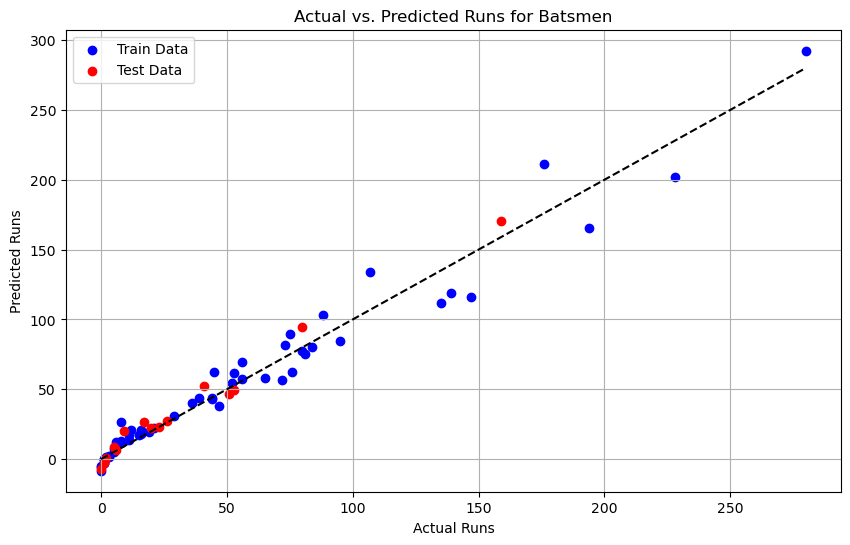

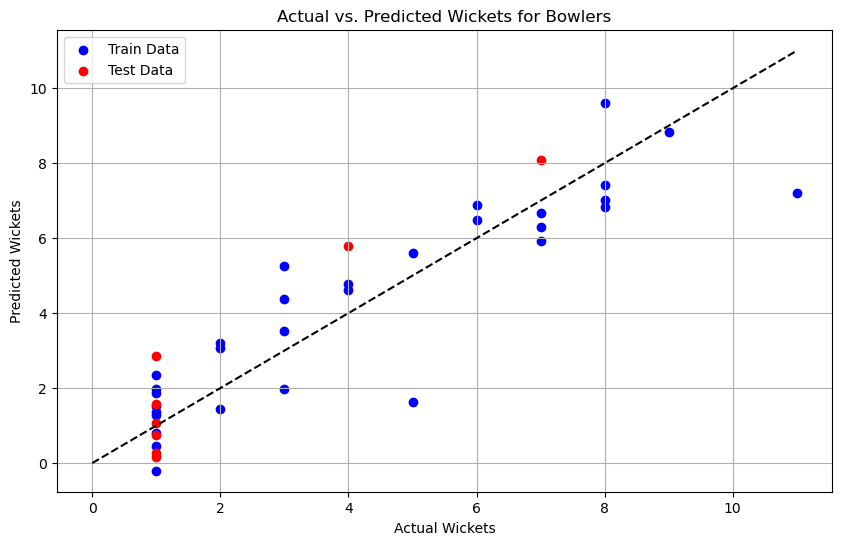

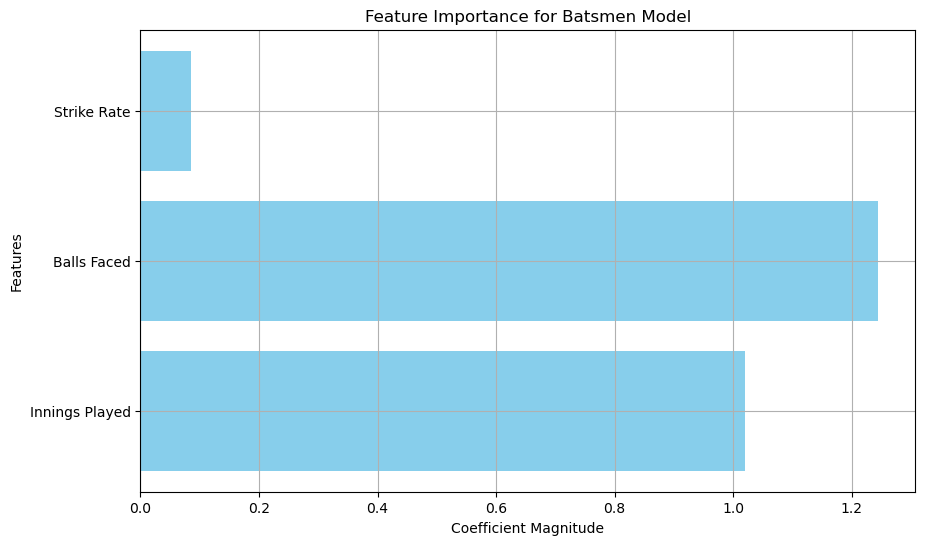

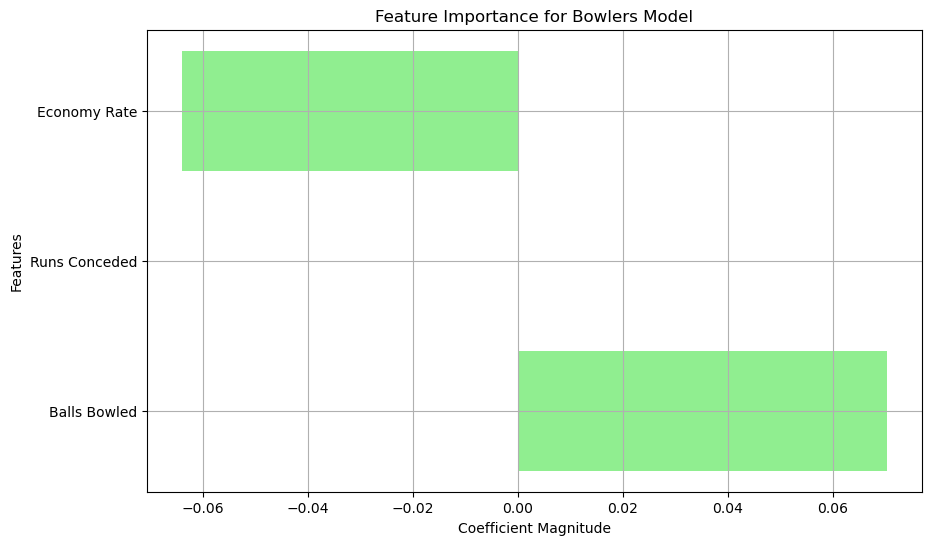

In [68]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs. predicted runs (for batsmen)
plt.figure(figsize=(10, 6))
plt.scatter(y_train_batsmen, batsmen_train_predictions, color='blue', label='Train Data')
plt.scatter(y_test_batsmen, batsmen_test_predictions, color='red', label='Test Data')
plt.plot([0, max(y_batsmen)], [0, max(y_batsmen)], color='black', linestyle='--')  # Diagonal line for reference
plt.title('Actual vs. Predicted Runs for Batsmen')
plt.xlabel('Actual Runs')
plt.ylabel('Predicted Runs')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot for actual vs. predicted wickets (for bowlers)
plt.figure(figsize=(10, 6))
plt.scatter(y_train_bowlers, bowlers_train_predictions, color='blue', label='Train Data')
plt.scatter(y_test_bowlers, bowlers_test_predictions, color='red', label='Test Data')
plt.plot([0, max(y_bowlers)], [0, max(y_bowlers)], color='black', linestyle='--')  # Diagonal line for reference
plt.title('Actual vs. Predicted Wickets for Bowlers')
plt.xlabel('Actual Wickets')
plt.ylabel('Predicted Wickets')
plt.legend()
plt.grid(True)
plt.show()

# Feature importance plot
plt.figure(figsize=(10, 6))
features_batsmen = ['Innings Played', 'Balls Faced', 'Strike Rate']
plt.barh(features_batsmen, batsmen_model.coef_, color='skyblue')
plt.title('Feature Importance for Batsmen Model')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Features')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
features_bowlers = ['Balls Bowled', 'Runs Conceded', 'Economy Rate']
plt.barh(features_bowlers, bowlers_model.coef_, color='lightgreen')
plt.title('Feature Importance for Bowlers Model')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Features')
plt.grid(True)
plt.show()

